In [ ]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=b1a3e38b3b437670b751d185d5556e2276e013ac7c492ec51390ad34ca58a943
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex


In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# load Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
# load Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

# load xgboost classifier model
from xgboost import XGBClassifier

# Load DALEX untuk interpretability
import dalex as dx

# load scikitplot untuk visualisasi metrik
# import scikitplot as skplt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Eksplorasi Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dibimbing Bootcamp Data Science/Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Info struktur data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Statistik deskriptif
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Jumlah nilai null
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data.rename(columns={'Exited': 'Churn'}, inplace=True)

In [ ]:
# Distribusi churn (Exited)
data['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,79.63
1,20.37


In [ ]:
# Melihat nilai unik dan jumlahnya di kolom 'Geography'
print(data['Geography'].value_counts())

# Melihat jumlah nilai unik di kolom 'Geography'
print(data['Geography'].nunique())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
3


In [ ]:
data['Gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Geography'].replace(['France','Germany','Spain'],[0,1,2],inplace=True)

/tmp/ipython-input-13-900507924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace(['Male','Female'],[0,1],inplace=True)
/tmp/ipython-input-13-900507924.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'].replace(['Male','Female'],[0,1],inplace=True)
/tmp/ipyth

In [ ]:
data.set_index('CustomerId', inplace=True)

# Train-Test Split Data

In [ ]:
X = data.drop(["Churn"], axis = 1)
y = data["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify = y,
    random_state=1000
)

# Data Exploration

In [ ]:
X_train["Churn"] = y_train

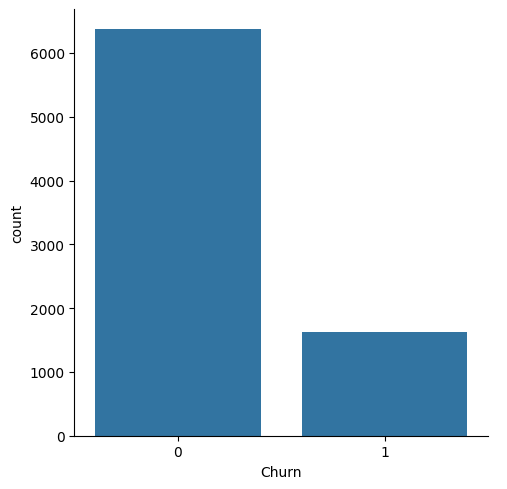

In [ ]:
sns.catplot(x = "Churn", kind = "count", data = X_train);

In [ ]:
y_train.value_counts(normalize=True)

,proportion
Churn,
0,0.79625
1,0.20375


In [ ]:
X_train = X_train.drop("Surname", axis=1)

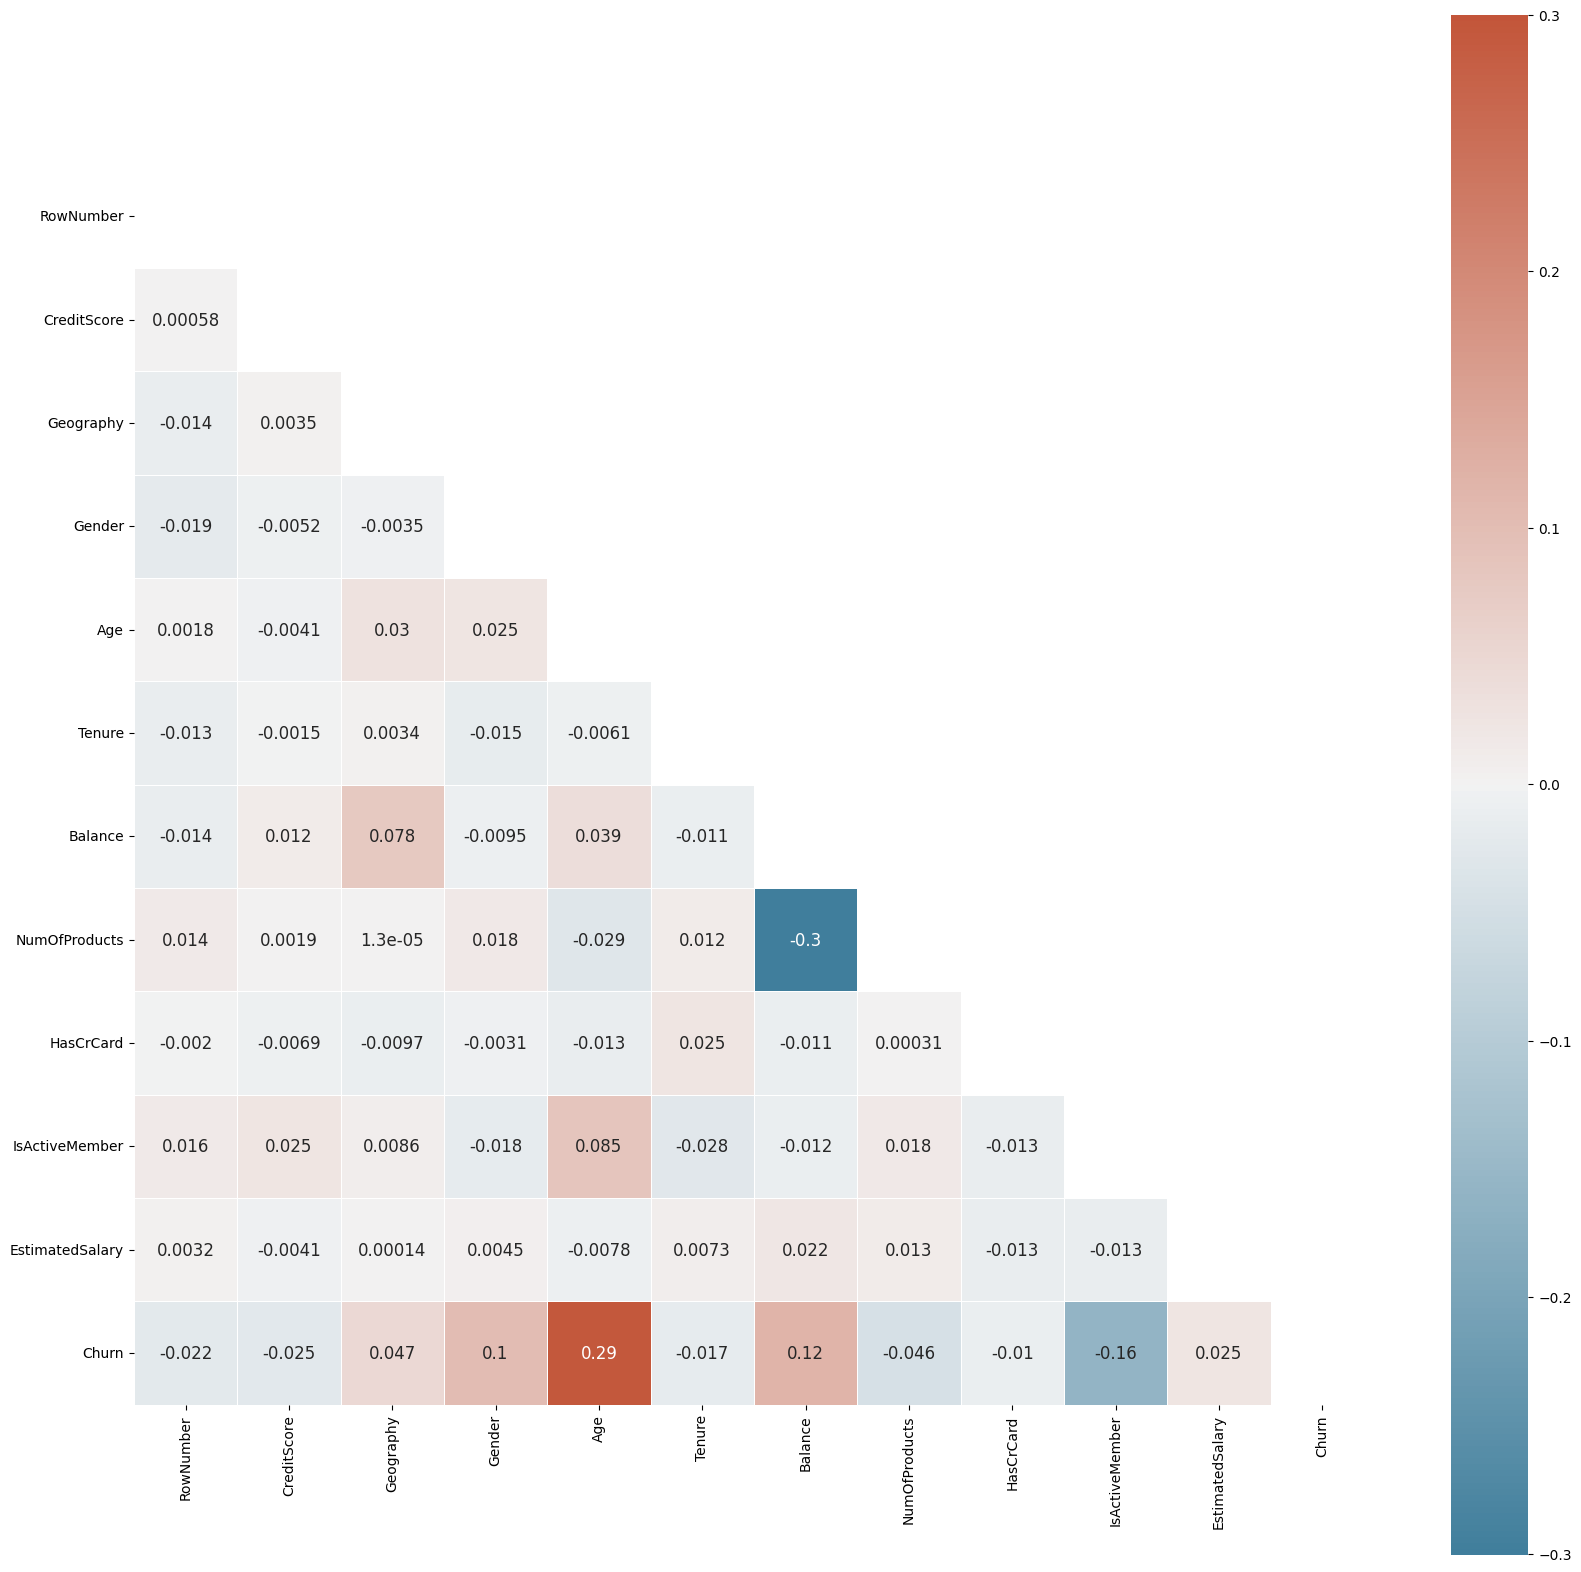

In [ ]:
corr = X_train.corr()
masking = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=masking,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    annot=True,
    annot_kws={'size':12}
);

## Categorical Data vs Exited

In [ ]:
def prop_agg(df, y, x):
  temp_df = df.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

In [ ]:
prop_agg(X_train, "Gender", "Churn")

,Gender,Churn,size,prop
0,0,0,3627,0.834177
1,0,1,721,0.165823
2,1,0,2743,0.751095
3,1,1,909,0.248905


**Gender vs Churn**

In [ ]:
def facet_barplot(data, feats, x_label, y_label):
    """
    data: DataFrame that includes 'gender', x_label, and y_label
    x_label: column name to use for x-axis and hue
    y_label: column name to use for y-axis
    """

    unique_x = data[x_label].unique()
    palette = sns.color_palette("Set2", len(unique_x))

    g = sns.FacetGrid(data=data, col=feats, sharey=True)

    g.map_dataframe(
        sns.barplot,
        x=x_label,
        y=y_label,
        hue=x_label,
        palette=palette,
        order=sorted(unique_x)
    )

    for ax in g.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2,
                height,
                f'{height:.2f}',
                ha="center",
                va="bottom"
            )

    g.add_legend()
    plt.tight_layout()
    plt.show()

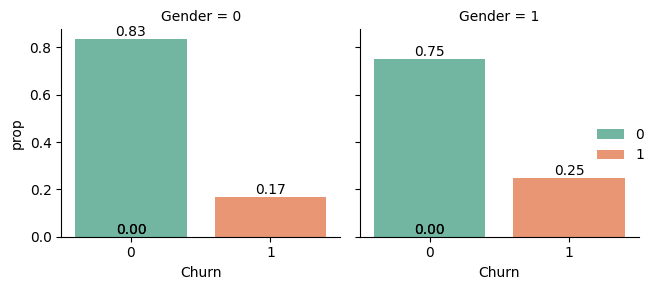

In [ ]:
feature = "Gender"

df = prop_agg(X_train, feature, "Churn")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Churn",
    y_label="prop"
)

Pelanggan perempuan memiliki tingkat churn sekitar 25%, sedangkan pelanggan laki-laki sekitar 17%.

Oleh karena itu, terdapat dua pendekatan yang dapat dipertimbangkan:

- Menghapus fitur Gender karena termasuk dalam fitur yang dilindungi (protected attribute) dan berisiko menyebabkan bias dalam model.

- Menghapus fitur Gender karena kontribusinya terhadap prediksi churn sangat kecil dan mungkin tidak meningkatkan akurasi model secara signifikan.

**Geography vs Churn**

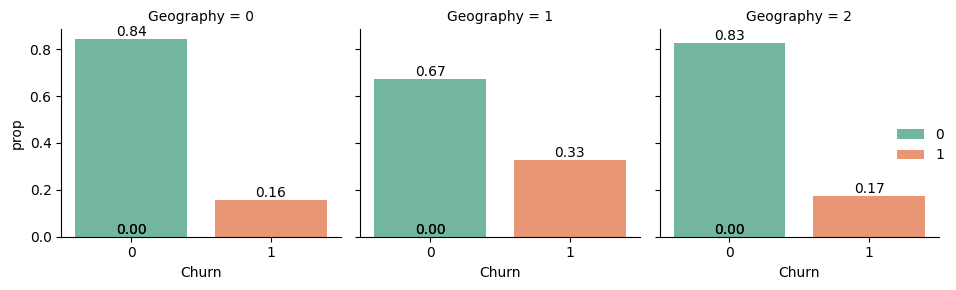

In [ ]:
feature = "Geography"

df = prop_agg(X_train, feature, "Churn")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Churn",
    y_label="prop"
)

Tampaknya pelanggan dari Geography = 1 (Jerman) memiliki kemungkinan churn yang jauh lebih tinggi (33%) dibandingkan dengan wilayah lain.

Pelanggan di wilayah ini perlu perhatian khusus karena lebih rentan untuk berhenti menggunakan layanan.

**NumOfProducts vs Churn**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)


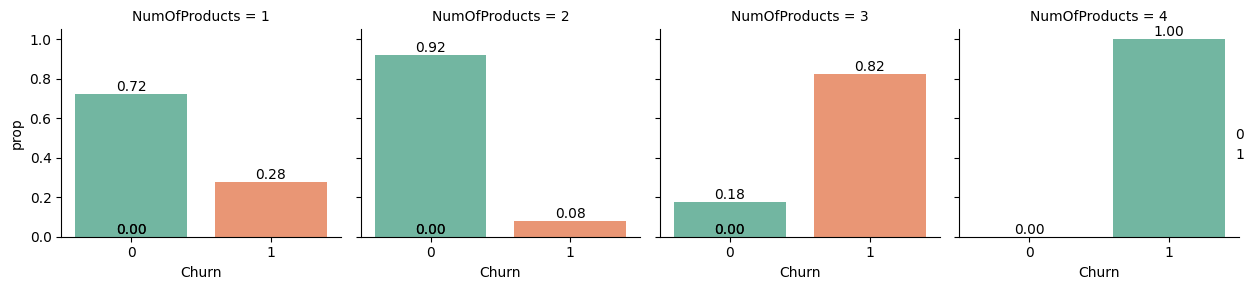

In [ ]:
feature = "NumOfProducts"

df = prop_agg(X_train, feature, "Churn")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Churn",
    y_label="prop"
)

Pelanggan dengan 2 produk memiliki tingkat churn yang paling rendah (8%), sedangkan pelanggan dengan 3 produk memiliki tingkat churn sangat tinggi (82%).

Jumlah produk yang terlalu banyak bisa menjadi beban atau tidak sesuai kebutuhan, yang berpotensi mendorong churn.

**HasCrCard vs Churn**

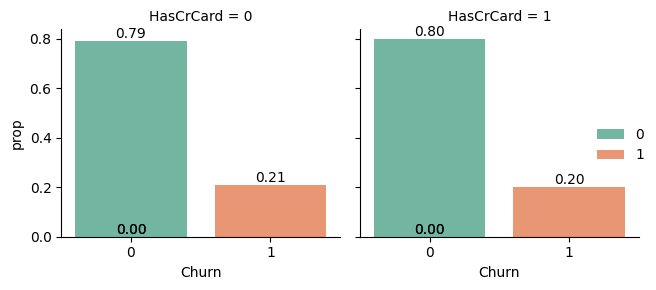

In [ ]:
feature = "HasCrCard"

df = prop_agg(X_train, feature, "Churn")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Churn",
    y_label="prop"
)

Tampaknya kepemilikan kartu kredit tidak terlalu berpengaruh terhadap churn; pelanggan dengan atau tanpa kartu kredit menunjukkan kemungkinan churn yang hampir sama.

**IsActiveMember vs Churn**

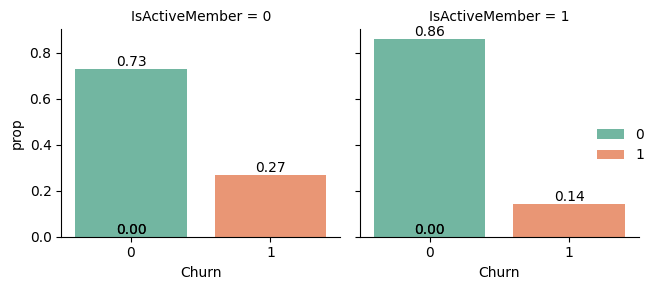

In [ ]:
feature = "IsActiveMember"

df = prop_agg(X_train, feature, "Churn")

facet_barplot(
    data=df,
    feats=feature,
    x_label="Churn",
    y_label="prop"
)

Tampaknya anggota yang aktif lebih kecil kemungkinannya untuk berhenti berlangganan daripada anggota yang tidak aktif.

**Tenure vs Churn**

/tmp/ipython-input-22-4010161497.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = df.groupby([y,x], as_index = False).size()
/tmp/ipython-input-22-4010161497.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')


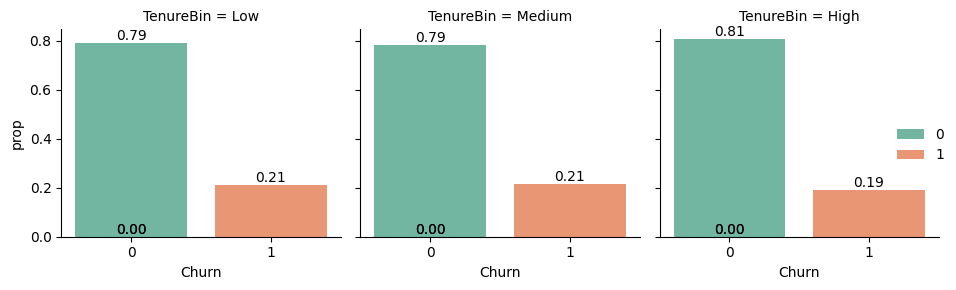

In [ ]:
X_train['TenureBin'] = pd.cut(X_train['Tenure'], bins=[-1, 2, 5, 10], labels=['Low', 'Medium', 'High'])
feature = "TenureBin"
df = prop_agg(X_train, feature, "Churn")
facet_barplot(data=df, feats=feature, x_label="Churn", y_label="prop")

Perbedaan churn berdasarkan masa keanggotaan (TenureBin) tidak terlalu signifikan. Pelanggan dengan masa keanggotaan pendek, menengah, maupun panjang semuanya memiliki tingkat churn sekitar 19–21%.

Artinya, durasi menjadi nasabah tidak terlalu mempengaruhi keputusan untuk berhenti.

**Age vs Churn**

/tmp/ipython-input-22-4010161497.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = df.groupby([y,x], as_index = False).size()
/tmp/ipython-input-22-4010161497.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')


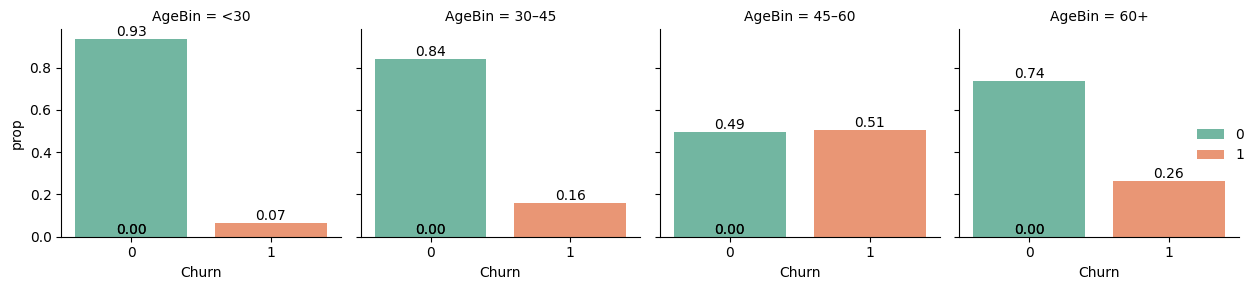

In [ ]:
X_train['AgeBin'] = pd.cut(X_train['Age'], bins=[17, 30, 45, 60, 100], labels=['<30', '30–45', '45–60', '60+'])
feature = "AgeBin"
df = prop_agg(X_train, feature, "Churn")
facet_barplot(data=df, feats=feature, x_label="Churn", y_label="prop")


Tingkat churn pelanggan ternyata bervariasi cukup signifikan berdasarkan kelompok usia:

- Usia < 30 tahun memiliki tingkat churn yang sangat rendah (hanya 7%) → mayoritas pelanggan muda tetap setia.

- Usia 30–45 tahun menunjukkan peningkatan churn menjadi 16%, namun tetap lebih rendah dari rata-rata keseluruhan.

- Usia 45–60 tahun merupakan kelompok dengan churn tertinggi (51% churn) → menjadi segmen yang paling rentan.

- Usia 60 tahun ke atas juga menunjukkan churn yang cukup tinggi (26%), meskipun sedikit lebih rendah dari segmen 45–60.

**faktor-faktor paling berpengaruh terhadap kemungkinan pelanggan melakukan churn**

- Age (Usia) – Pelanggan yang lebih tua cenderung memiliki probabilitas churn lebih tinggi.

- Balance (Saldo rekening) – Pelanggan dengan saldo tinggi yang churn bisa menandakan ketidakpuasan meski memiliki dana.

- IsActiveMember – Pelanggan yang tidak aktif memiliki kemungkinan churn lebih tinggi.

- Number of Products – Pelanggan yang hanya memiliki satu produk cenderung churn lebih sering dibandingkan yang memiliki lebih banyak produk.

- Geography – Pelanggan dari negara tertentu (misalnya Jerman) menunjukkan tingkat churn yang lebih tinggi.

- Gender – Mungkin ada sedikit perbedaan churn berdasarkan jenis kelamin, tergantung hasil eksplorasi.



## Numerical Data vs Churn

**Balance vs Churn**

<Axes: xlabel='Churn', ylabel='Balance'>

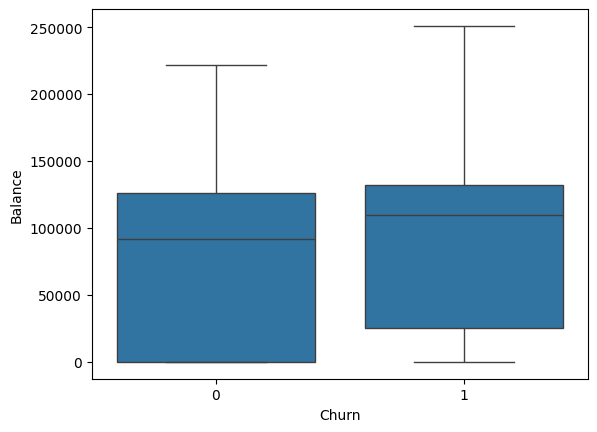

In [ ]:
sns.boxplot(x="Churn", y="Balance", data=X_train)

Terlihat perbedaan antara dua grup. Pelanggan dengan saldo lebih tinggi cenderung lebih mudah churn.

**EstimatedSalary vs Churn**

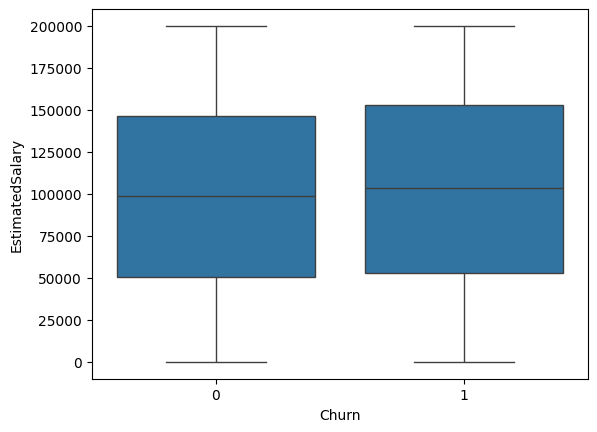

In [ ]:
sns.boxplot(x = "Churn", y = "EstimatedSalary", data = X_train);

Terlihat tidak ada perbedaan signifikan. Gaji tidak terlalu memengaruhi kemungkinan churn.

**Tenure vs Churn**

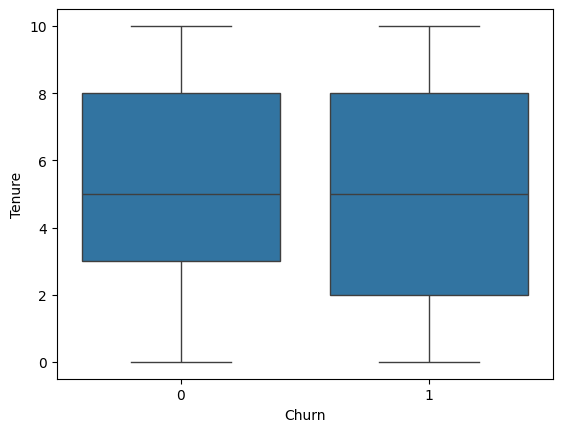

In [ ]:
sns.boxplot(x = "Churn", y = "Tenure", data = X_train);

Tidak terlihat perbedaan berarti. Lama menjadi nasabah tidak banyak berpengaruh terhadap churn.

**CreditScore vs Churn**

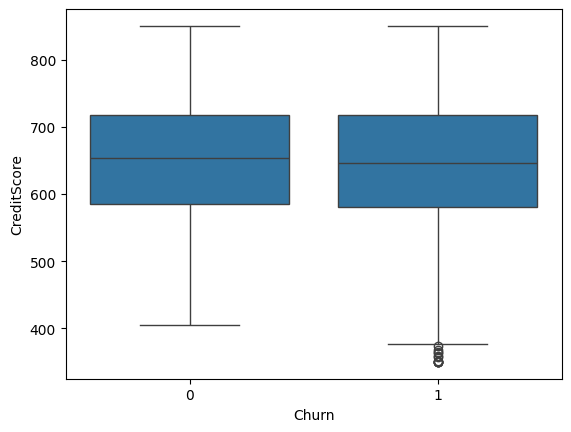

In [ ]:
sns.boxplot(x = "Churn", y = "CreditScore", data = X_train);

Skor kredit tidak menunjukkan pengaruh besar terhadap churn.

**Age vs Churn**

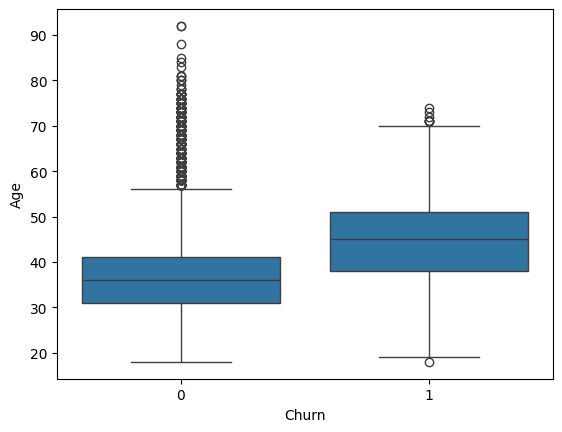

In [ ]:
sns.boxplot(x = "Churn", y = "Age", data = X_train);

Pelanggan yang churn cenderung berusia lebih tua dibandingkan yang tidak churn.

In [ ]:
X_train = X_train.drop(["Churn"], axis = 1)

# Modeling

## Define Model

We will use 5 models:

- KNN as a baseline model
- Decision tree
- Random Forest
- SVM RBF
- XGBoost
- Logistic Regression


In [ ]:
y_train.value_counts(normalize=True)

,proportion
Churn,
0,0.79625
1,0.20375


In [ ]:
class_weights = {0: 0.265353, 1: 0.734647}

**KNN**

In [ ]:
knn_clf = KNeighborsClassifier(
    n_neighbors=5
)

**Decision Tree**

In [ ]:
dc_clf = DecisionTreeClassifier(
    max_depth=5,
    ccp_alpha=0.001,
    class_weight=class_weights
)

**Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight=class_weights
)

**SVM RBF**

In [ ]:
svm_clf = SVC(
    random_state=1000,
    probability=True,
    class_weight=class_weights
)

**XGBoost**

In [ ]:
xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=class_weights[1] / class_weights[0]
)

**Logistic Regression**

In [ ]:
logreg_clf = LogisticRegression(
    solver='liblinear',
    class_weight=class_weights,
    random_state=1000
)

## Fitting Model to Data

In [ ]:
X_train = X_train.drop(columns=["Churn", "TenureBin", "AgeBin", "Surname"], errors='ignore')

**KNN**

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

**Decision Tree**

In [ ]:
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.265353, 1: 0.734647},
                       max_depth=5)

**Random Forest**

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.265353, 1: 0.734647},
                       n_estimators=1000, random_state=1000)

**SVM RBF**

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 0.265353, 1: 0.734647}, probability=True,
    random_state=1000)

**XGBoost**

In [ ]:
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=1000, ...)

**Logistic Regression**

In [ ]:
logreg_clf.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.265353, 1: 0.734647}, random_state=1000,
                   solver='liblinear')

## Model Evaluation

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
X_test = X_test.drop("Surname", axis=1)

In [ ]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

# Logistic Regression prediction
logreg_pred = logreg_clf.predict(X_test)
logreg_pred_proba = logreg_clf.predict_proba(X_test)

**KNN Evaluation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix"):
    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels if labels else sorted(set(y_true)),
                yticklabels=labels if labels else sorted(set(y_true)))

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.tight_layout()
    plt.show()


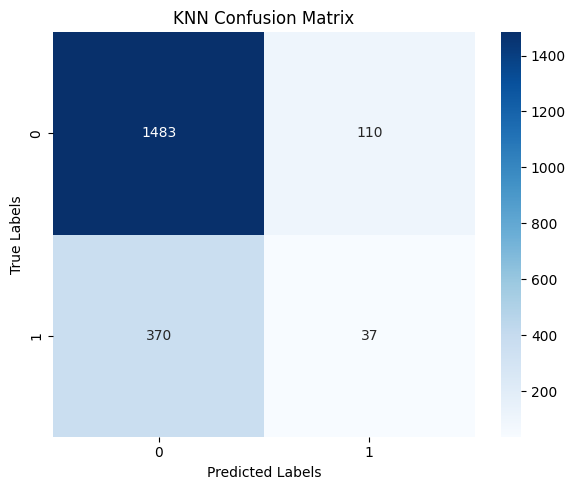

In [ ]:
plot_confusion_matrix(y_test, knn_pred, labels=[0, 1], title="KNN Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.800324,0.251701,0.76,0.526012,0.688679
recall,0.930948,0.090909,0.76,0.510928,0.760000
f1-score,0.860708,0.133574,0.76,0.497141,0.712736
support,1593.000000,407.000000,0.76,2000.000000,2000.000000


**Decision Tree**

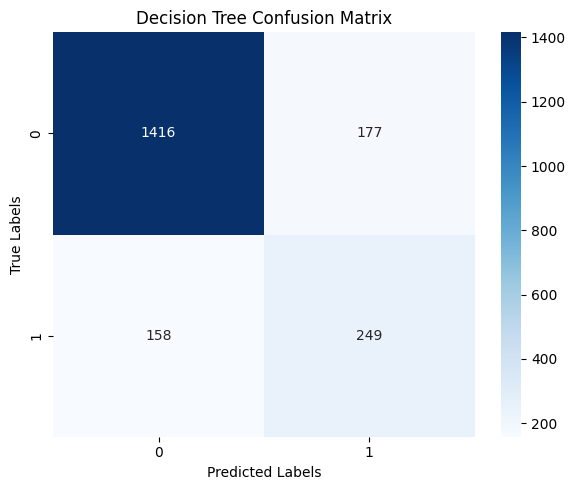

In [ ]:
plot_confusion_matrix(y_test, dc_pred, labels=[0, 1], title="Decision Tree Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.899619,0.584507,0.8325,0.742063,0.835494
recall,0.888889,0.611794,0.8325,0.750341,0.832500
f1-score,0.894222,0.597839,0.8325,0.746030,0.833908
support,1593.000000,407.000000,0.8325,2000.000000,2000.000000


**Random Forest**

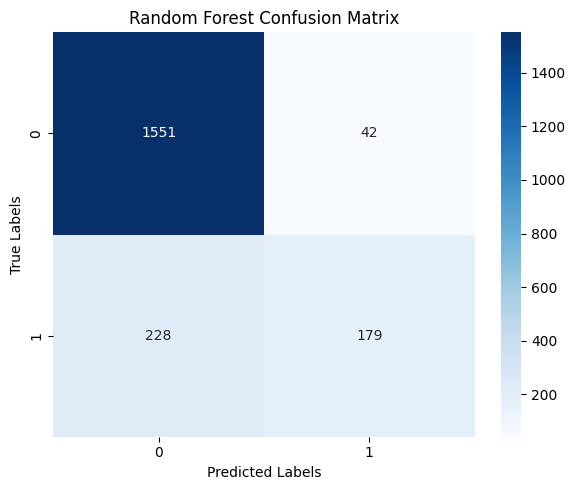

In [ ]:
plot_confusion_matrix(y_test, rf_pred, labels=[0, 1], title="Random Forest Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.871838,0.809955,0.865,0.840896,0.859245
recall,0.973635,0.439803,0.865,0.706719,0.865000
f1-score,0.919929,0.570064,0.865,0.744996,0.848731
support,1593.000000,407.000000,0.865,2000.000000,2000.000000


**SVM RBF**

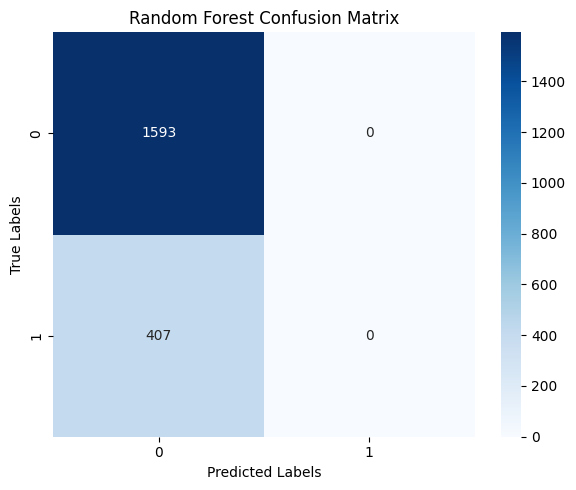

In [ ]:
plot_confusion_matrix(y_test, svm_pred, labels=[0, 1], title="Random Forest Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Not Churn','Churn'], output_dict=True))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.796500,0.0,0.7965,0.398250,0.634412
recall,1.000000,0.0,0.7965,0.500000,0.796500
f1-score,0.886724,0.0,0.7965,0.443362,0.706276
support,1593.000000,407.0,0.7965,2000.000000,2000.000000


**XGBoost**

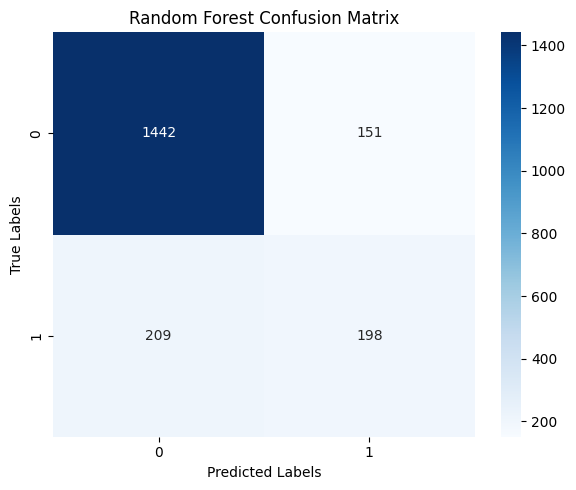

In [ ]:
plot_confusion_matrix(y_test, xgb_pred, labels=[0, 1], title="Random Forest Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.873410,0.567335,0.82,0.720373,0.811124
recall,0.905210,0.486486,0.82,0.695848,0.820000
f1-score,0.889026,0.523810,0.82,0.706418,0.814704
support,1593.000000,407.000000,0.82,2000.000000,2000.000000


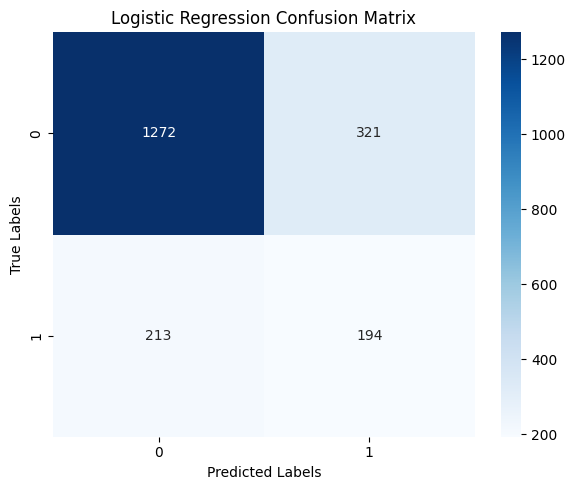

In [ ]:
plot_confusion_matrix(y_test, logreg_pred, labels=[0, 1], title="Logistic Regression Confusion Matrix")

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, logreg_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.856566,0.376699,0.733,0.616632,0.758913
recall,0.798493,0.476658,0.733,0.637576,0.733000
f1-score,0.826511,0.420824,0.733,0.623668,0.743954
support,1593.000000,407.000000,0.733,2000.000000,2000.000000


## Model Result

### Plot ROC and Precision-Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


def plot_roc_curve(y_true, y_scores, title="ROC AUC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_precision_recall_with_opt_threshold(y_true, y_scores, title="Precision-Recall Curve"):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    thresholds = np.append(thresholds, 1.0)

    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_index = np.argmax(f1_scores)
    best_threshold = thresholds[best_index]
    best_f1 = f1_scores[best_index]

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f'AP = {average_precision_score(y_true, y_scores):.2f}')
    plt.scatter(recall[best_index], precision[best_index],
                color='red', zorder=10,
                label=f'Best F1 = {best_f1:.2f}\nThreshold = {best_threshold:.2f}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return best_threshold

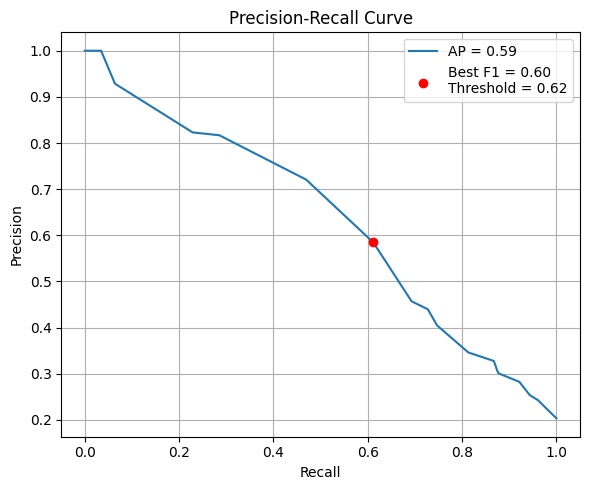

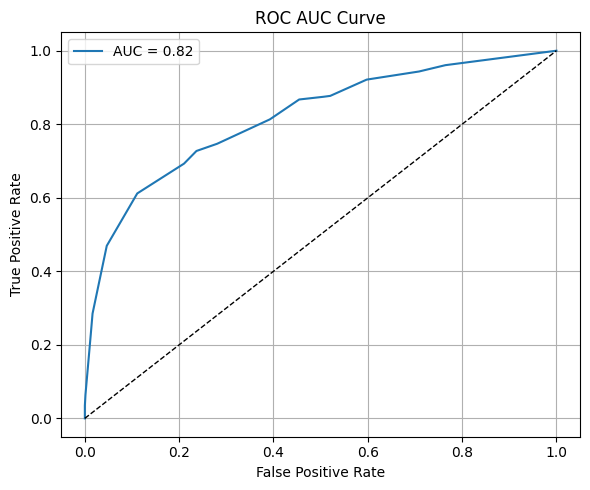

In [ ]:
y_proba = dc_clf.predict_proba(X_test)[:, 1]

best_thresh = plot_precision_recall_with_opt_threshold(y_test, y_proba)
plot_roc_curve(y_test, y_proba)

Analisis Hasil Model

- Model yang digunakan menunjukkan performa yang cukup baik, dengan AUC sebesar 0.82, dan F1 Score terbaik tercapai pada threshold 0.62.

- Dari confusion matrix dan metrik evaluasi (precision, recall, F1-score), model mampu membedakan pelanggan yang akan churn dan tidak, meskipun masih terdapat trade-off antara recall dan precision.

- Threshold 0.62 dipilih karena memberikan keseimbangan terbaik antara menangkap pelanggan yang benar-benar churn (recall) dan menghindari terlalu banyak false positive.

### Prioritize Customer

In [ ]:
X = X.drop("Surname", axis=1)

In [ ]:
data['probability_churn'] = dc_clf.predict_proba(X)[:,1]
data['predicted_churn'] = dc_clf.predict(X)

In [ ]:
data[data['probability_churn']>=0.54].shape

(2100, 15)

In [ ]:
data_churn = data[data['probability_churn']>=0.54]
data_churn.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,probability_churn,predicted_churn
CustomerId,,,,,,,,,,,,,,,
15634602,1,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1,0.617674,1
15619304,3,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1,0.991858,1
15737888,5,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0,0.617674,1
15656148,8,Obinna,376,1,1,29,4,115046.74,4,1,0,119346.88,1,0.879044,1
15737452,17,Romeo,653,1,0,58,1,132602.88,1,1,0,5097.67,1,0.946509,1


In [ ]:
data_churn.sort_values('Balance', ascending=False)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,probability_churn,predicted_churn
CustomerId,,,,,,,,,,,,,,,
15757408,2093,Lo,655,2,0,38,3,250898.09,3,0,1,81054.00,1,0.879044,1
15715622,3281,To Rot,583,0,1,57,3,238387.56,1,0,1,147964.99,1,0.617674,1
15714241,8734,Haddon,749,2,0,42,9,222267.63,1,0,0,101108.85,1,0.781870,1
15586674,6718,Shaw,663,2,1,58,5,216109.88,1,0,1,74176.71,1,0.617674,1
15594408,139,Chia,584,2,1,48,2,213146.20,1,1,0,75161.25,1,0.781870,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15661409,7943,Shen,542,0,1,42,1,0.00,1,1,1,178256.58,1,0.617674,1
15803538,7916,Douglas,695,2,0,56,1,0.00,3,1,0,187734.49,1,0.946509,1
15570931,7910,Grant,620,0,0,61,5,0.00,1,0,0,31641.52,1,0.946509,1


# Temuan Utama

1. Proporsi churn adalah 20.38%, menunjukkan adanya masalah retensi pelanggan.

2. Pelanggan yang tidak aktif jauh lebih mungkin untuk churn.

3. Negara dengan rasio churn tertinggi adalah Jerman, sementara Spanyol memiliki churn terendah.

4. Pelanggan dengan jumlah produk = 1 memiliki kemungkinan churn tertinggi.

5. Usia juga memainkan peran: pelanggan berusia 45 tahun ke atas menunjukkan kecenderungan lebih tinggi untuk churn.

# Rekomendasi Bisnis
1. Fokus Retensi pada Pelanggan Berisiko Tinggi: Gunakan threshold 0.62 untuk menargetkan pelanggan yang paling berisiko churn secara efektif tanpa membuang anggaran untuk pelanggan yang tidak churn.

2. Tingkatkan Engagement Pelanggan Tidak Aktif: Buat kampanye khusus untuk pelanggan dengan flag IsActiveMember = 0, misalnya dengan email personalisasi atau program loyalitas.

3. Segmentasi Berdasarkan Usia dan Produk: Berikan penawaran spesifik kepada pelanggan yang lebih tua atau yang hanya menggunakan satu produk agar mereka mencoba layanan lain (cross-selling).

4. Perhatikan Perbedaan Geografis: Jika churn lebih tinggi di satu negara (misalnya Jerman), evaluasi apakah ada isu lokal seperti kualitas layanan, bahasa, atau regulasi yang memengaruhi churn.

5. Pantau dan Evaluasi Secara Berkala: Model dan insight ini harus diperbaharui secara berkala agar tetap relevan terhadap perilaku pelanggan yang terus berubah.